In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("/Users/kent/git/courses/python_ML2/session4_kaggle/house_prices_advanced_regression_techniques/train.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Drop Id
train = train.drop('Id', 1)

In [6]:
# train.drop(['MiscVal'], axis = 1, inplace = True)
#1. Convert NA into 'No' Categorical values
meaningfulNA = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
train[meaningfulNA] = train[meaningfulNA].fillna('No')

In [7]:
# do shuffle
train = train.sample(frac=1,random_state=1)


In [8]:
intVar = train.select_dtypes(include = ['int']).columns.tolist()
floatVar = train.select_dtypes(include = ['float']).columns.tolist()
objectVar = train.select_dtypes(include = ['object']).columns.tolist()


print("intVar =>",intVar,"\n")
print("floatVar =>",floatVar,"\n")
print("objectVar =>",objectVar,"\n")







intVar => ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] 

floatVar => ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'] 

objectVar => ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', '

In [9]:
len(intVar)

34

# 進行資料編碼

In [10]:
cate_data = train[objectVar]
cate_data.values

array([['RL', 'Pave', 'No', ..., 'No', 'WD', 'Normal'],
       ['RL', 'Pave', 'No', ..., 'No', 'WD', 'Normal'],
       ['RL', 'Pave', 'No', ..., 'No', 'WD', 'Normal'],
       ..., 
       ['RM', 'Pave', 'No', ..., 'No', 'WD', 'Normal'],
       ['RM', 'Pave', 'No', ..., 'No', 'WD', 'Normal'],
       ['C (all)', 'Grvl', 'No', ..., 'Shed', 'ConLD', 'Normal']], dtype=object)

In [11]:


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
Xstr = cate_data.values.astype(dtype="str")
# transform to integer
Xint = LabelEncoder().fit_transform(Xstr.ravel()).reshape(*Xstr.shape)
# transform to binary
Xbin = OneHotEncoder().fit_transform(Xint).toarray()



In [12]:
X_cate = Xbin
X_cate

array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 1.,  0.,  0., ...,  0.,  1.,  0.]])

In [13]:
from sklearn.preprocessing import StandardScaler
stds = StandardScaler()
X_float = train[floatVar]
X_int = train[intVar[:-1]]

print(X_float.shape)
print(X_int.shape)

(1460, 3)
(1460, 33)


In [14]:
X_real = np.column_stack((X_float,X_int))
X_real = np.nan_to_num(X_real)

X_real_scaled = stds.fit_transform(X_real)
X_real_scaled.shape

(1460, 36)

In [15]:
X_all = np.column_stack((X_real_scaled,X_cate))
X_all.shape

(1460, 303)

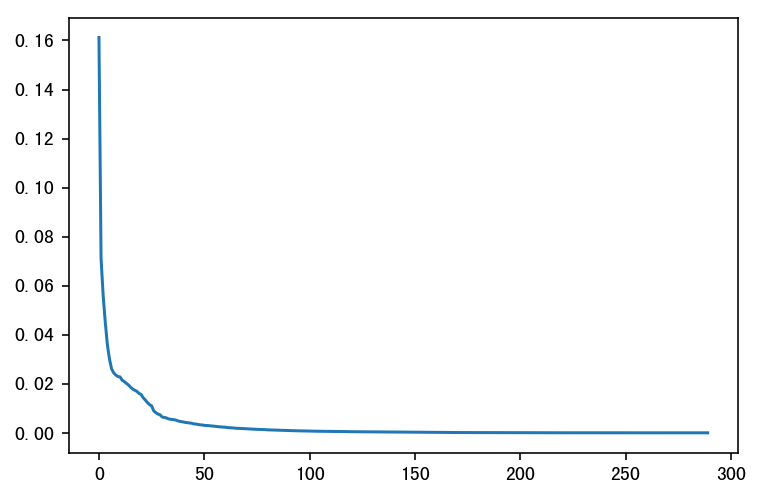

In [16]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=290,whiten=True)
X_train_pca = pca.fit_transform(X_all)

plt.plot(pca.explained_variance_ratio_)


In [17]:
Y = train['SalePrice']

stds_y = StandardScaler()
Y_scaled = stds_y.fit_transform(Y.reshape(-1, 1))
Y_scaled

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.63688999],
       [-0.01789575],
       [-0.74193766],
       ..., 
       [-0.67897749],
       [-1.15117874],
       [-1.25821103]])

In [18]:
from sklearn.linear_model import LinearRegression,SGDRegressor,BayesianRidge
from sklearn import metrics
lr = SGDRegressor(loss='squared_loss', 
                  penalty='l1', alpha=0.005, l1_ratio=0.15, 
                  fit_intercept=True, max_iter=None, tol=None, 
                  shuffle=True, verbose=0, epsilon=0.1, random_state=1, learning_rate='invscaling', 
                  eta0=0.01, power_t=0.25, warm_start=False, average=False, n_iter=None)


# lr = BayesianRidge(n_iter=300, tol=0.001, alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, 
#                    lambda_2=1e-06, compute_score=False, fit_intercept=True, normalize=True, 
#                    copy_X=True, verbose=False)

lr.fit(X_train_pca[:-100],Y_scaled[:-100])


# 拿 training 直接驗證
predict_y = lr.predict(X_train_pca[-100:])
metrics.mean_absolute_error(Y[-100:],stds_y.inverse_transform(predict_y))

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


15620.960568981267

In [71]:
lr.coef_

array([  8.53942745e-01,  -4.79872570e-03,   1.10518411e-01,
        -2.36182530e-02,   1.41862709e-02,  -1.17714132e-01,
         5.91569627e-02,  -4.12053500e-02,  -5.45724911e-03,
         6.34045981e-02,   2.62153120e-02,   0.00000000e+00,
         0.00000000e+00,  -2.60594151e-02,  -2.49264654e-02,
        -1.34383939e-02,   3.02888081e-02,  -1.13434480e-02,
        -3.40987194e-02,   2.99929429e-02,  -2.93259797e-02,
         1.82615167e-02,  -3.13837929e-02,   0.00000000e+00,
         4.99455550e-02,   8.64455224e-02,  -8.69678855e-02,
         2.29083204e-02,   1.06108895e-02,  -2.43781943e-02,
        -4.52177986e-02,  -4.57642209e-02,  -2.09299464e-02,
        -6.43498484e-02,  -2.14623495e-02,   8.61508045e-04,
         6.71083333e-03,   2.99307236e-02,   3.18029928e-03,
         0.00000000e+00,  -2.80891155e-02,  -3.96399501e-02,
         3.25534629e-02,  -6.41809254e-03,   0.00000000e+00,
        -3.25871918e-02,   0.00000000e+00,   7.71294754e-03,
         2.84984668e-02,

# Use NN

In [19]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras import initializers
from keras import optimizers

Using TensorFlow backend.
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [20]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

Y = train['SalePrice']
stds_y = MinMaxScaler(feature_range=(0, 1), copy=True)
Y_scaled = stds_y.fit_transform(Y.reshape(-1, 1))
Y_scaled

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.27301764],
       [ 0.20080544],
       [ 0.12095542],
       ..., 
       [ 0.1278989 ],
       [ 0.0758228 ],
       [ 0.06401889]])

In [114]:
input_x = Input(shape=(X_all.shape[1],))


In [115]:
h1 = Dense(32,activation='linear',
               kernel_regularizer=regularizers.l1(0.005),)(input_x)

output = Dense(1,activation='linear',
               kernel_regularizer=regularizers.l1(0.005),)(input_x)

In [116]:
model = Model(input_x,output)


In [117]:
model.compile(optimizer=optimizers.Adagrad(),
              loss='mean_squared_error',)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 303)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 304       
Total params: 304
Trainable params: 304
Non-trainable params: 0
_________________________________________________________________


In [123]:

error = model.fit(X_all[100:],Y_scaled[100:],
                  batch_size=8,validation_split=0.10,
                  validation_steps=None,epochs=200,verbose=0)
    


In [124]:
error.history['loss']

[0.0034044893105435216,
 0.0034117088592276463,
 0.0034223971454718826,
 0.0034034259128840824,
 0.0034023357868754591,
 0.003379752280440157,
 0.0033988516307527235,
 0.0033775091436052439,
 0.0033878986906333299,
 0.0033966011879052603,
 0.0033971481185004699,
 0.003376261454404277,
 0.0033770276193987895,
 0.0033916904213625232,
 0.0033724791525552669,
 0.0033835608609556374,
 0.003388825831386973,
 0.0033867772915126648,
 0.0033632195280755266,
 0.0033869824115053014,
 0.0033810748399107481,
 0.0033738304940021894,
 0.003378499906473592,
 0.0033837191492708681,
 0.0033723726165572217,
 0.0033658824654089082,
 0.0033718091877043442,
 0.0033667264498611973,
 0.003398473697921468,
 0.0033623425920000847,
 0.0033784987917778635,
 0.0033718075814772566,
 0.0033714244776752358,
 0.0033680660965140254,
 0.0033700612215386105,
 0.0033676241451472627,
 0.0033702658248907016,
 0.0033526686575641139,
 0.0033606791882501807,
 0.0033634670468327267,
 0.0033690750726736059,
 0.003367641916364626

In [125]:
# 拿 training 直接驗證
predict_y = model.predict(X_all[:100])
metrics.mean_absolute_error(Y[:100], stds_y.inverse_transform(predict_y))

18079.386552734373